# Stress detection for IT professionals using machine learning

# **Importing Necessary Packages and Loading The Dataset**

In [4]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
#Let's Load the data using panda library
df = pd.read_csv(r'stress_detection_IT_professionals_dataset.csv')

In [3]:
#Let's print the first 5 records of the data
df.head()

,Heart_Rate,Skin_Conductivity,Hours_Worked,Stress_Level,Emails_Sent,Meetings_Attended
0,87,5.56,5,28,31,6
1,74,5.89,5,25,42,3
2,79,4.58,9,26,28,4
3,92,5.10,7,30,37,3
4,88,5.23,8,29,35,6


In [5]:
#Let's print the last 5 records of the data
df.tail()

,Heart_Rate,Skin_Conductivity,Hours_Worked,Stress_Level,Emails_Sent,Meetings_Attended
995,74,5.10,13,26,36,1
996,68,6.40,7,24,31,5
997,70,5.16,8,23,27,3
998,58,3.86,6,21,34,6
999,66,3.69,8,22,36,1


In [6]:
#Printing the shape of the dataset
df.shape

(1000, 6)

In [10]:
#Getting the data types of all the columns
df.dtypes

Heart_Rate             int64
Skin_Conductivity    float64
Hours_Worked           int64
Stress_Level           int64
Emails_Sent            int64
Meetings_Attended      int64
dtype: object

In [7]:
df.isnull().sum()

Heart_Rate           0
Skin_Conductivity    0
Hours_Worked         0
Stress_Level         0
Emails_Sent          0
Meetings_Attended    0
dtype: int64

**Here in our dataset we have both object and float data types.**

In [11]:
#check details about the data set
print("Here is the information about our data set which includes the number of columns, number of rows, data types , null counts and the memory size as well :")
df.info()

Here is the information about our data set which includes the number of columns, number of rows, data types , null counts and the memory size as well :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Heart_Rate         1000 non-null   int64  
 1   Skin_Conductivity  1000 non-null   float64
 2   Hours_Worked       1000 non-null   int64  
 3   Stress_Level       1000 non-null   int64  
 4   Emails_Sent        1000 non-null   int64  
 5   Meetings_Attended  1000 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 47.0 KB


In [12]:
#Here is the unique values in our data
print("The unique values in each and every column in our data are as below:")
df.nunique()

The unique values in each and every column in our data are as below:


Heart_Rate            56
Skin_Conductivity    368
Hours_Worked          13
Stress_Level          16
Emails_Sent           37
Meetings_Attended     10
dtype: int64

In [13]:
print('The statistical information about our data set is as below :')
df.describe(include='all').T

The statistical information about our data set is as below :


,count,mean,std,min,25%,50%,75%,max
Heart_Rate,1000.0,69.03700,9.870717,39.00,62.7500,69.00,76.00,97.00
Skin_Conductivity,1000.0,5.01366,0.968644,2.01,4.3475,5.03,5.63,8.17
Hours_Worked,1000.0,8.38600,1.932547,2.00,7.0000,8.00,10.00,14.00
Stress_Level,1000.0,23.35400,2.595654,16.00,22.0000,23.00,25.00,31.00
Emails_Sent,1000.0,29.79200,5.580850,13.00,26.0000,30.00,33.00,49.00
Meetings_Attended,1000.0,2.95900,1.720546,0.00,2.0000,3.00,4.00,9.00


**The above table shows the statistical information about the each and every column of our data set.**

In [14]:
# Let's Check the duplicated values in our data
df.duplicated().sum()

0

**From the above we came to know that there is no duplicate values in our data set.**

# **Exploratory Data Analysis (EDA)**

In [15]:
#Let's check the null values present in the data set
df.isnull().sum()

Heart_Rate           0
Skin_Conductivity    0
Hours_Worked         0
Stress_Level         0
Emails_Sent          0
Meetings_Attended    0
dtype: int64

**From the above we found that there are some missing values in emp_title,emp_length,title, revol_util, mort_acc and Pub_rec_bankruptcies column**

# It creates a dataframe called 'missing' that calculates the percentage of missing values in each column of the 'df' dataset. It then plots a graph using seaborn library, displaying the percentage of missing values for each column as data points on the y-axis. The x-axis represents the column names. This graph helps visualize the extent of missing data in the dataset, allowing for easy identification of columns with high percentages of missing values.

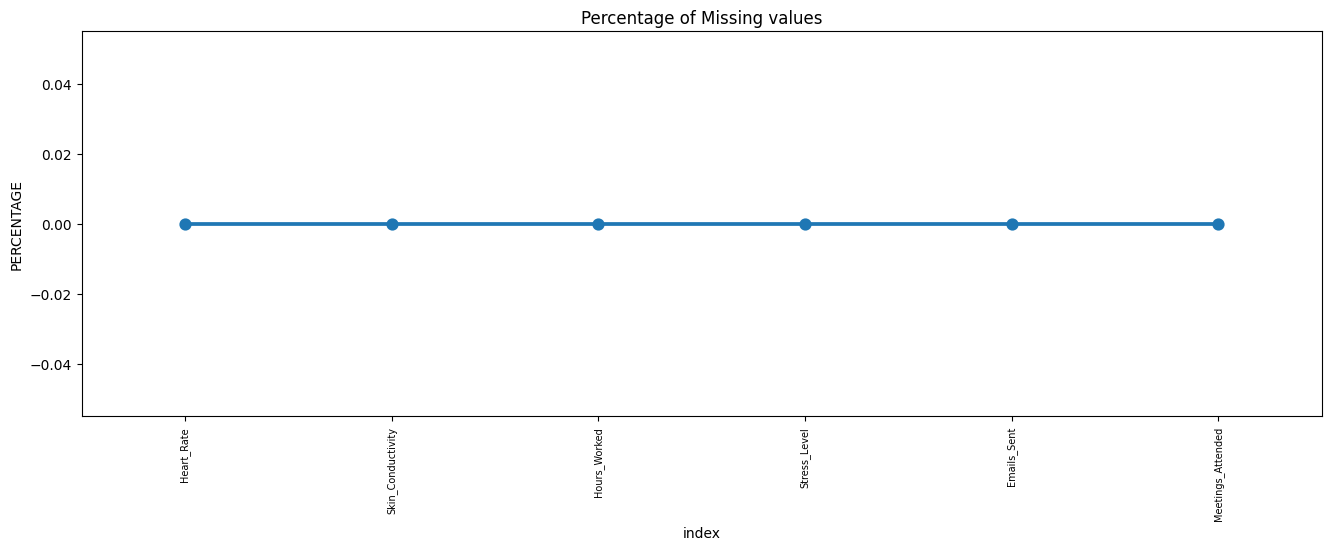

In [16]:
#plot the graph to check wether there are any missing value present
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

<Axes: >

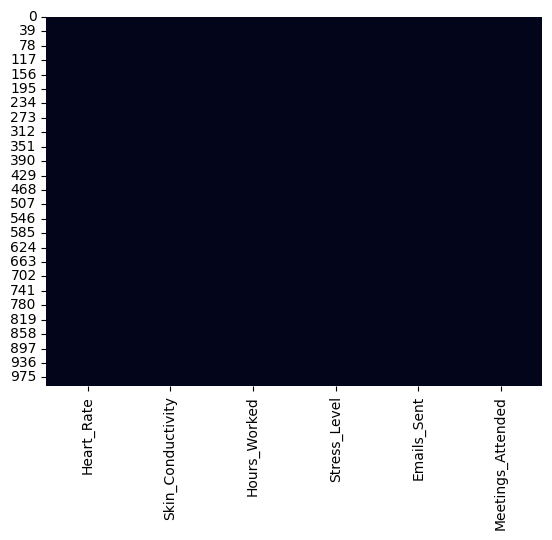

In [17]:
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

In [18]:
print("Here are the columnn names of our data set :")
df.columns

Here are the columnn names of our data set :


Index(['Heart_Rate', 'Skin_Conductivity', 'Hours_Worked', 'Stress_Level',
       'Emails_Sent', 'Meetings_Attended'],
      dtype='object')

<Axes: xlabel='Stress_Level', ylabel='count'>

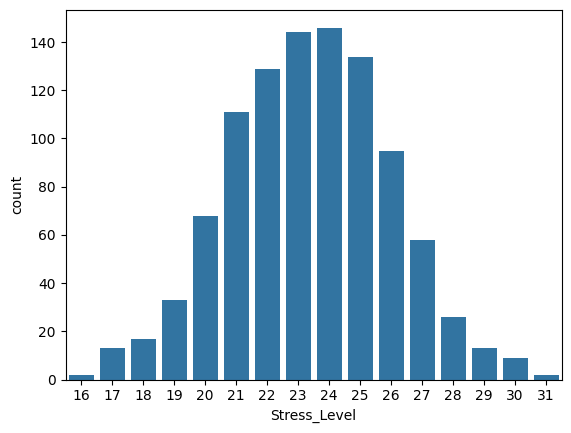

In [19]:
#let's see loan_amnt by using countplot
sns.countplot(x=df.Stress_Level)

C:\Users\0420\AppData\Local\Temp\ipykernel_7252\3858069671.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Heart_Rate'])


<Axes: xlabel='Heart_Rate', ylabel='Density'>

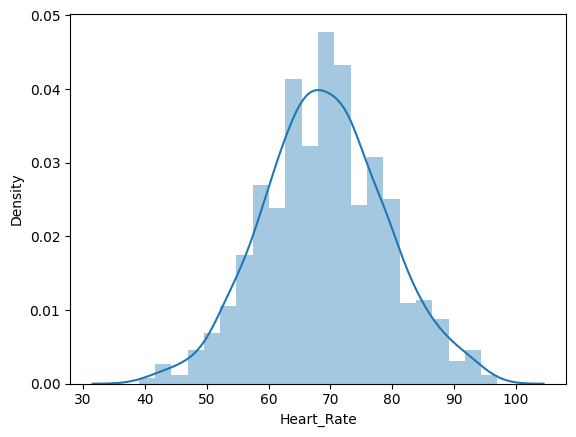

In [20]:
#  distribution plot for Heart_Rate column
sns.distplot(df['Heart_Rate'])

C:\Users\0420\AppData\Local\Temp\ipykernel_7252\723861079.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Skin_Conductivity'])


<Axes: xlabel='Skin_Conductivity', ylabel='Density'>

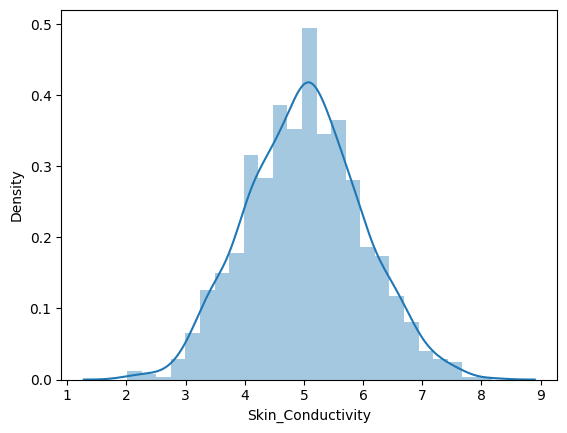

In [21]:
#  distribution plot for Skin_Conductivity column
sns.distplot(df['Skin_Conductivity'])

C:\Users\0420\AppData\Local\Temp\ipykernel_7252\2938904501.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Hours_Worked'])


<Axes: xlabel='Hours_Worked', ylabel='Density'>

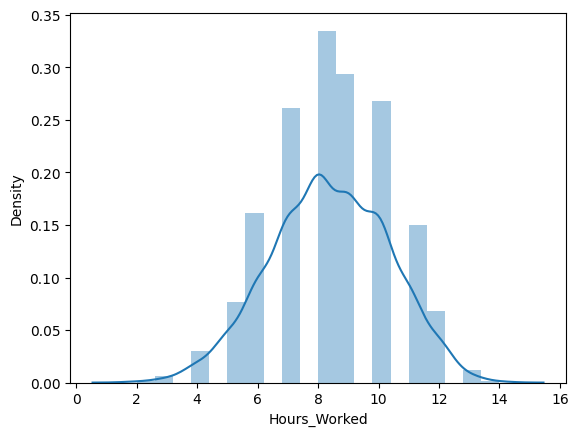

In [22]:

#  distribution plot for Hours_Worked column
sns.distplot(df['Hours_Worked'])

C:\Users\0420\AppData\Local\Temp\ipykernel_7252\1412489661.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Emails_Sent'])


<Axes: xlabel='Emails_Sent', ylabel='Density'>

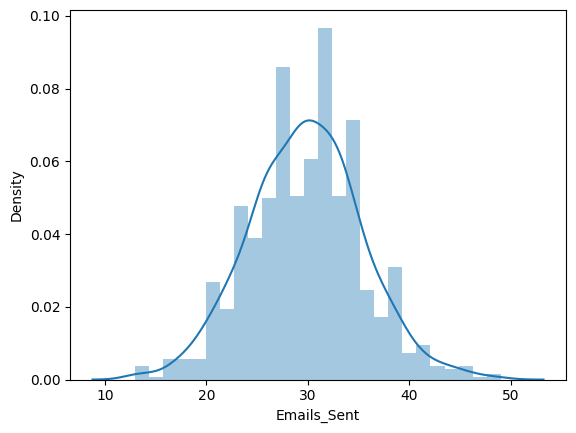

In [23]:
#  distribution plot for Emails_Sent column
sns.distplot(df['Emails_Sent'])

C:\Users\0420\AppData\Local\Temp\ipykernel_7252\3159842197.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Meetings_Attended'])


<Axes: xlabel='Meetings_Attended', ylabel='Density'>

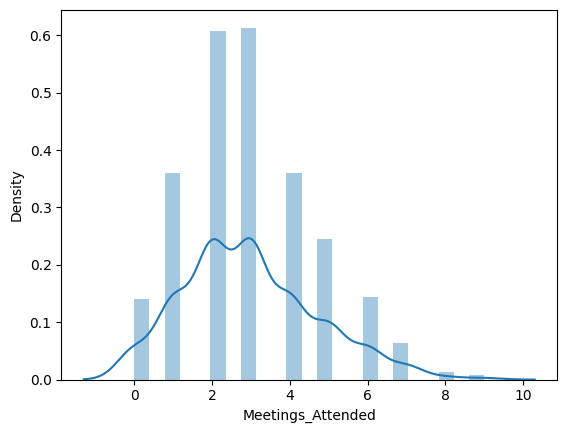

In [24]:

#  distribution plot for Meetings_Attended column
sns.distplot(df['Meetings_Attended'])

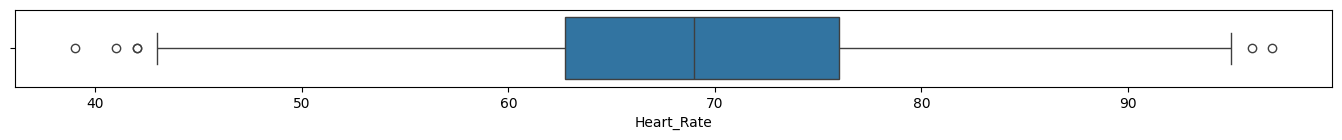

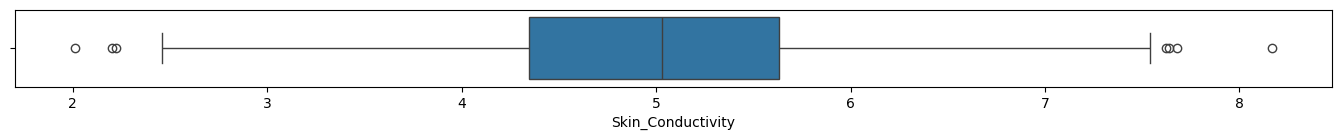

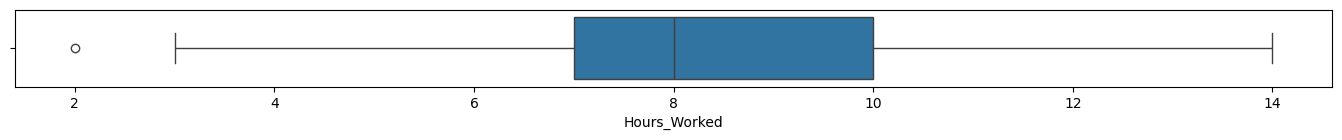

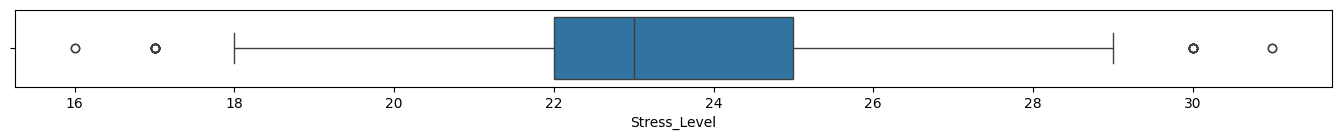

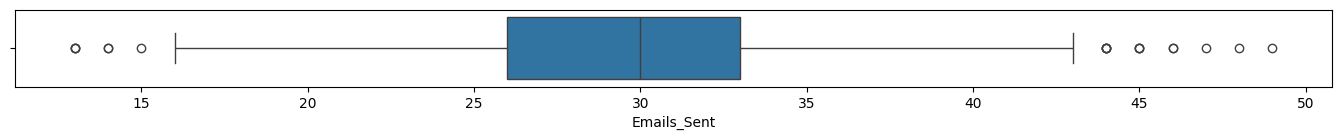

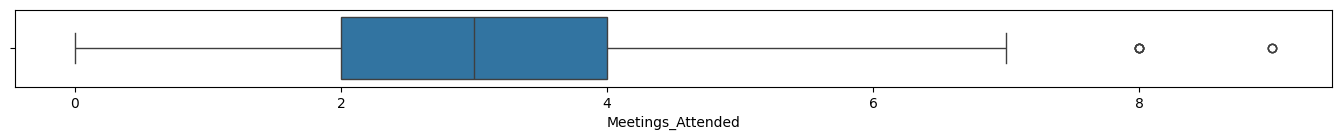

In [25]:
# Univariate Analysis
#Printing boxplot for each numerical column present in the data set
df1=df.select_dtypes(exclude=['object','bool'])
for column in df1:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df1, x=column)
plt.show()

<Figure size 1700x100 with 0 Axes>

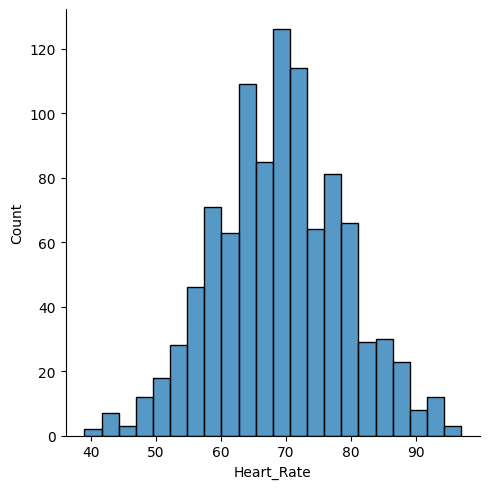

<Figure size 1700x100 with 0 Axes>

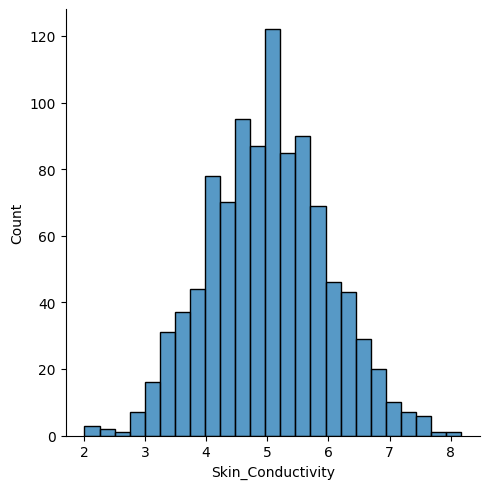

<Figure size 1700x100 with 0 Axes>

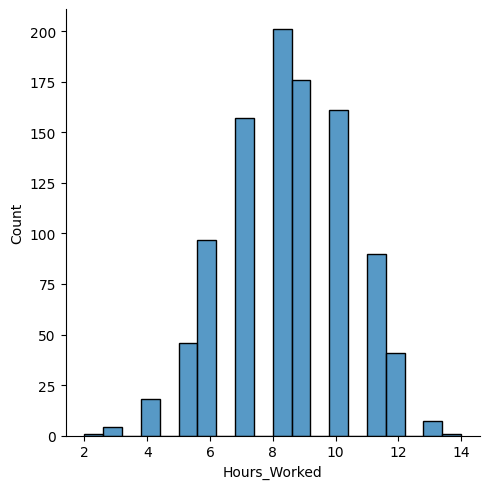

<Figure size 1700x100 with 0 Axes>

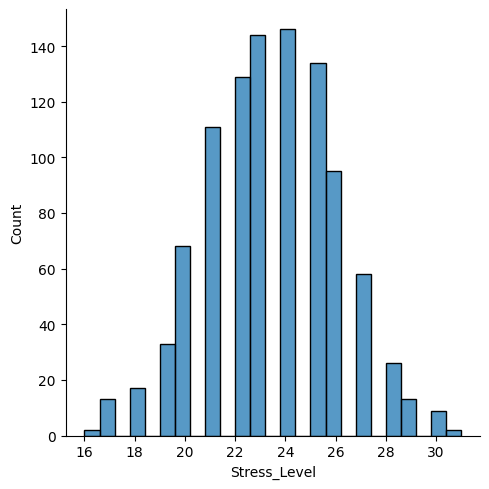

<Figure size 1700x100 with 0 Axes>

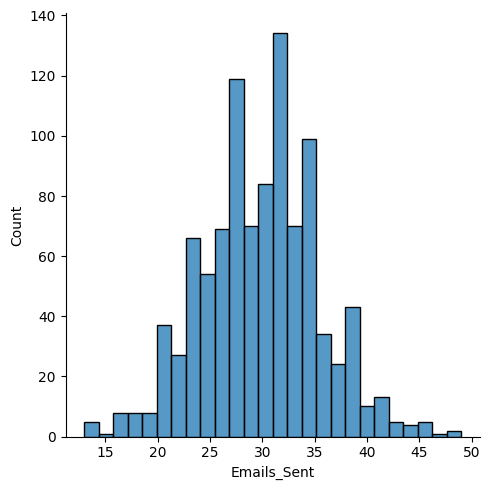

<Figure size 1700x100 with 0 Axes>

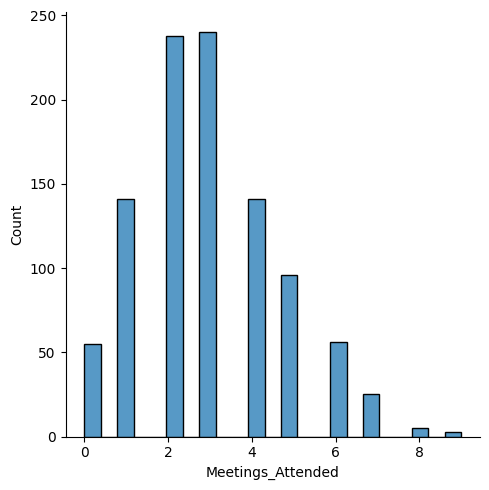

In [26]:
#Printing displot for each numerical column present in the data set
df1=df.select_dtypes(exclude=['object','bool'])
for column in df1:
        plt.figure(figsize=(17,1))
        sns.displot(data=df1, x=column)
plt.show()

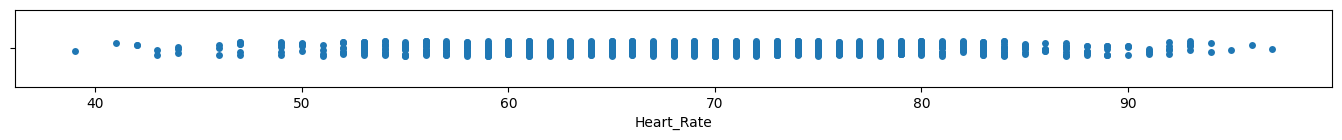

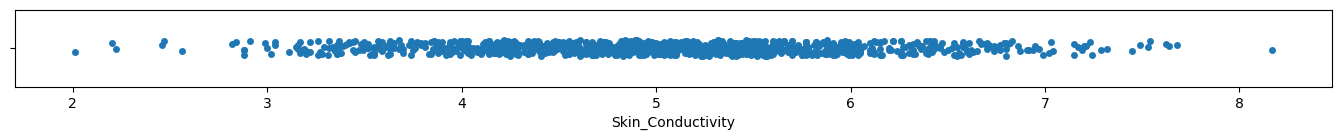

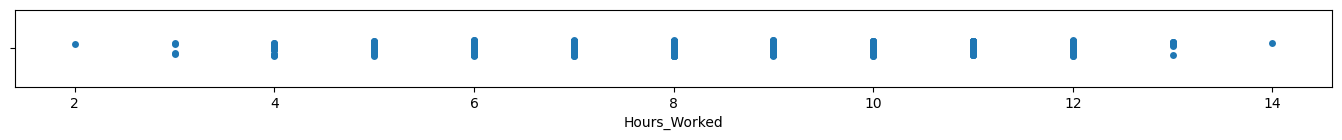

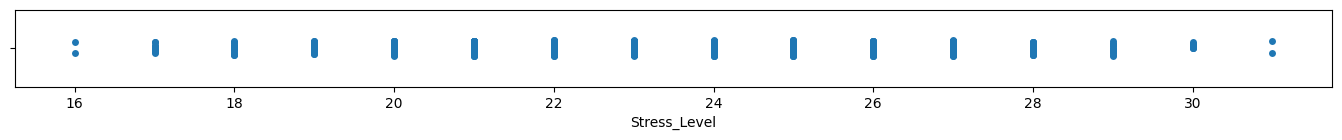

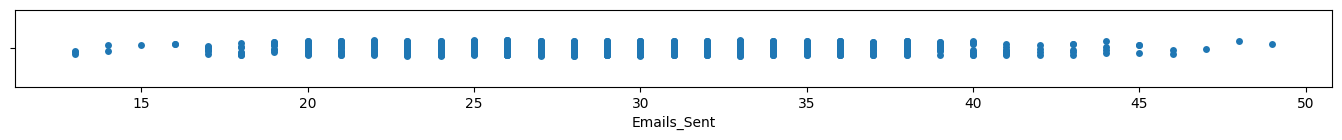

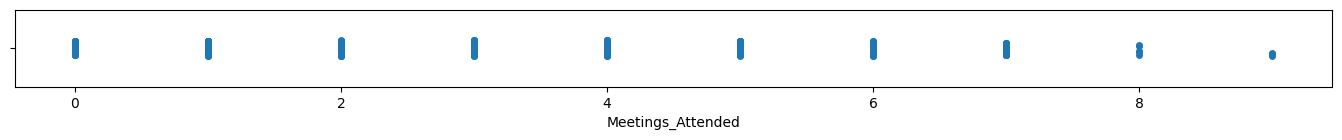

In [27]:
df1=df.select_dtypes(exclude=['object','bool'])
for column in df1:
        plt.figure(figsize=(17,1))
        sns.stripplot(data=df1, x=column)
plt.show()

array([[<Axes: title={'center': 'Heart_Rate'}>,
        <Axes: title={'center': 'Skin_Conductivity'}>],
       [<Axes: title={'center': 'Hours_Worked'}>,
        <Axes: title={'center': 'Stress_Level'}>],
       [<Axes: title={'center': 'Emails_Sent'}>,
        <Axes: title={'center': 'Meetings_Attended'}>]], dtype=object)

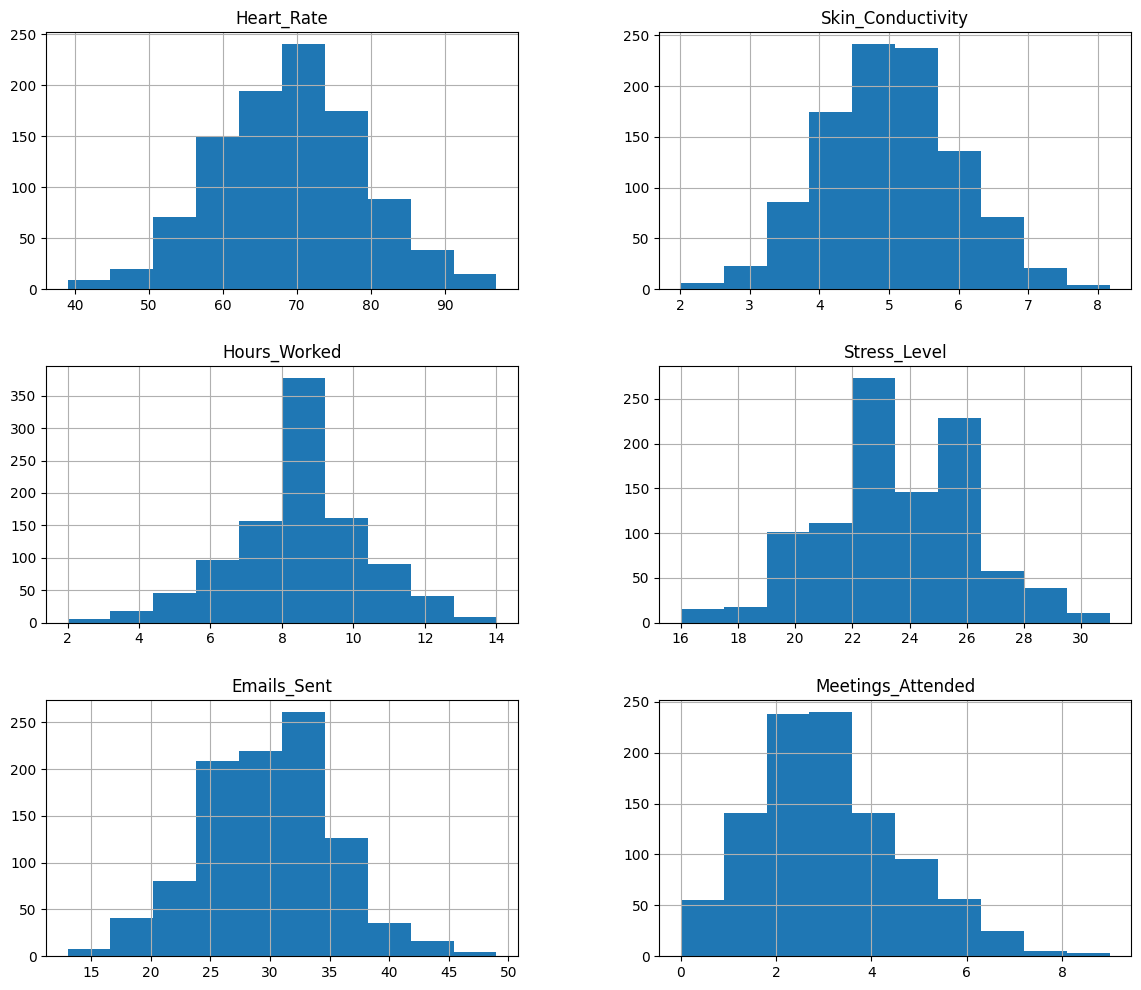

In [28]:
df.hist(figsize = (14,12)) #shows graphically the value counts of each column

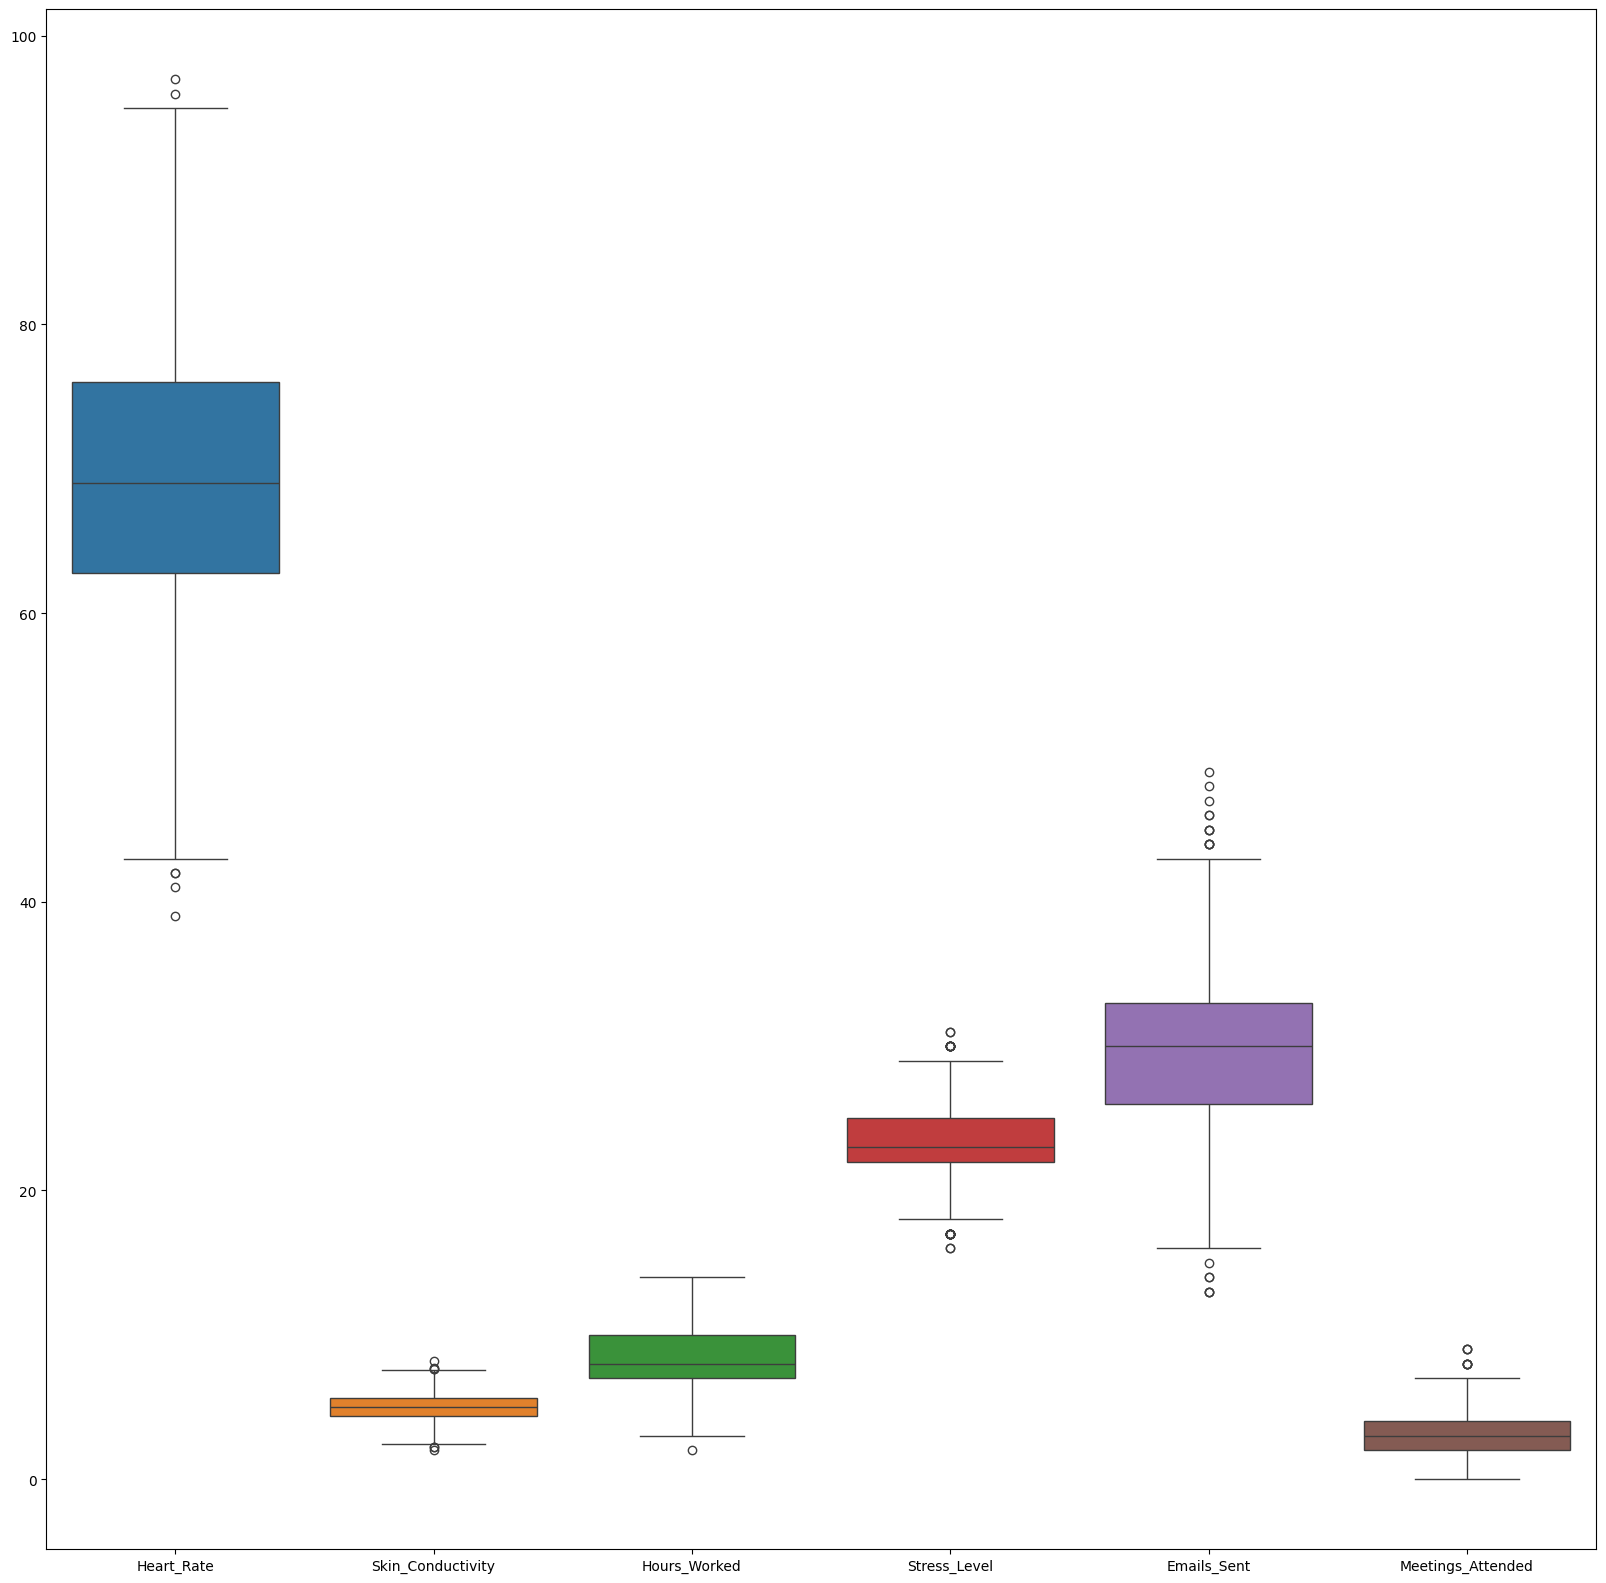

In [29]:
#box plot
plt.figure(figsize=(20,20))
ax = sns.boxplot(data=df)

# **Data Preprocessing**

<Axes: >

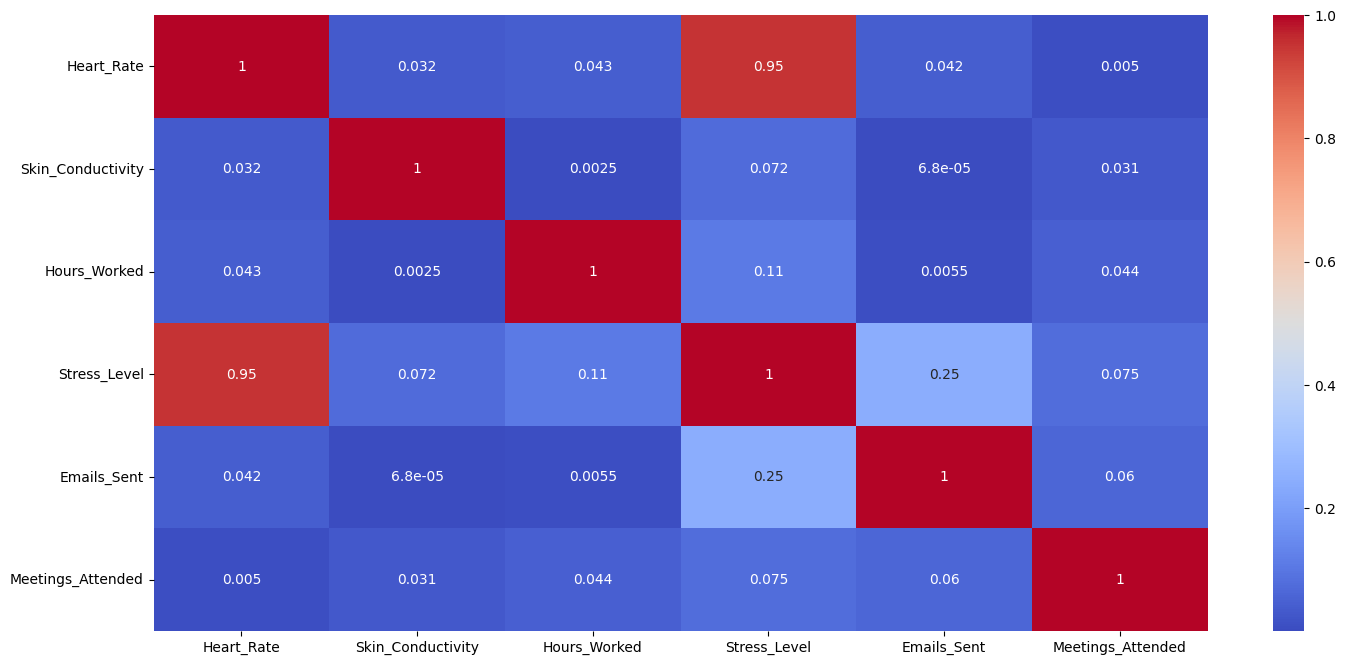

In [30]:
## plot the Correlation matrix
plt.figure(figsize=(17,8))
correlation=df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

#### **Splitting of data into train and test**

In [32]:
x = df.drop(['Stress_Level'], axis=1)
y = df['Stress_Level']

In [33]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,stratify=y, random_state= 42)

In [34]:
x_test

,Heart_Rate,Skin_Conductivity,Hours_Worked,Emails_Sent,Meetings_Attended
135,76,4.73,7,31,1
744,62,5.60,10,49,3
653,75,5.81,8,37,5
325,66,4.78,10,38,3
25,55,4.21,7,33,2
...,...,...,...,...,...
934,66,5.68,6,28,4
791,69,5.61,7,35,1
748,51,6.97,7,37,5
101,56,4.97,9,29,3


In [35]:
y_test

135    25
744    24
653    26
325    24
25     20
       ..
934    22
791    23
748    20
101    20
264    18
Name: Stress_Level, Length: 300, dtype: int64

# **Model Building**

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error

# RandomForestRegressor

In [37]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

C:\Users\0420\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\0420\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0420\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


RandomForestRegressor()

In [38]:
pred_rf = rf.predict(x_test)

C:\Users\0420\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\0420\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0420\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [39]:
rf_r2 = r2_score(pred_rf,y_test)
rf_r2

0.9687169989834228

In [40]:
rf_ma = mean_absolute_error(pred_rf,y_test)
rf_ma

0.34366666666666673

In [41]:
rf_sq = mean_squared_error(pred_rf,y_test)
rf_sq

0.207204

# AdaBoostRegressor

In [43]:
ad = AdaBoostRegressor()
ad.fit(x_train,y_train)

C:\Users\0420\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\0420\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0420\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


AdaBoostRegressor()

In [44]:
pred_ad = ad.predict(x_test)

C:\Users\0420\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\0420\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0420\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [45]:
ad_r2 = r2_score(pred_ad,y_test)
ad_r2

0.9320252352455641

In [46]:
ad_ma = mean_absolute_error(pred_ad,y_test)
ad_ma

0.525956134676425

In [47]:
ad_sq = mean_squared_error(pred_ad,y_test)
ad_sq

0.4269498224277362

# ExtraTreeRegressor

In [48]:
ex = ExtraTreeRegressor()
ex.fit(x_train,y_train)

C:\Users\0420\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\0420\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0420\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


ExtraTreeRegressor()

In [49]:
pred_ex = ex.predict(x_test)

C:\Users\0420\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\0420\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0420\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [50]:
ex_r2 = r2_score(pred_ex,y_test)
ex_r2

0.9252331790229222

In [51]:
ex_ma = mean_absolute_error(pred_ex,y_test)
ex_ma

0.4666666666666667

In [53]:
ex_sq = mean_squared_error(pred_ex,y_test)
ex_sq

0.5333333333333333

In [54]:
graph5 = pd.DataFrame({'Models':['Random Forest Regressor','AdaBoostRegressor','ExtraTreeRegressor'],'Accuracy':[rf_r2*100,ad_r2*100,ex_r2*100]})
graph5

,Models,Accuracy
0,Random Forest Regressor,96.871700
1,AdaBoostRegressor,93.202524
2,ExtraTreeRegressor,92.523318


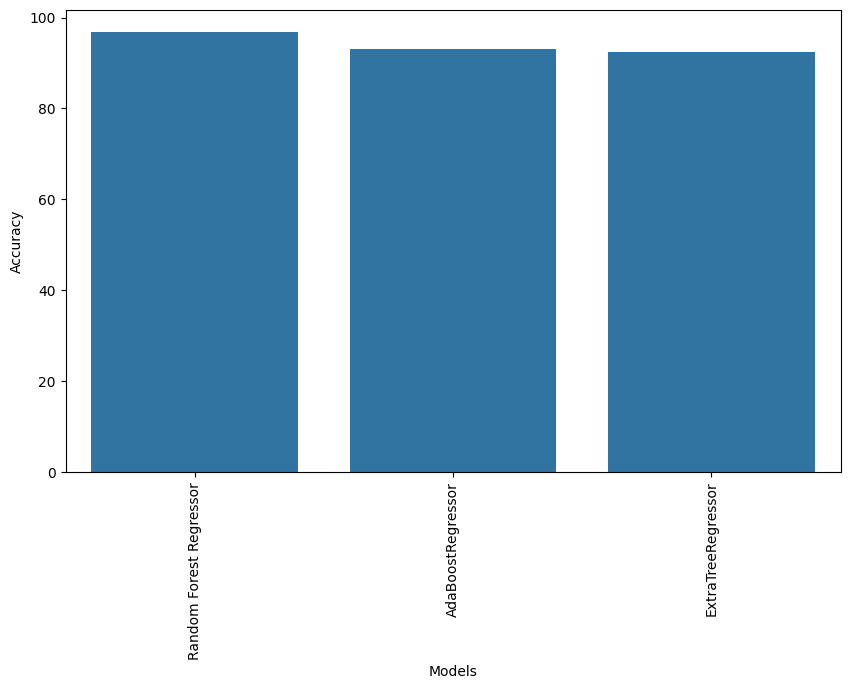

In [55]:
plt.figure(figsize = (10,6))
sns.barplot(y = graph5.Accuracy,x = graph5.Models)
plt.xticks(rotation = 'vertical')
plt.show()

# **Prediction**

In [57]:
df

,Heart_Rate,Skin_Conductivity,Hours_Worked,Stress_Level,Emails_Sent,Meetings_Attended
0,87,5.56,5,28,31,6
1,74,5.89,5,25,42,3
2,79,4.58,9,26,28,4
3,92,5.10,7,30,37,3
4,88,5.23,8,29,35,6
...,...,...,...,...,...,...
995,74,5.10,13,26,36,1
996,68,6.40,7,24,31,5
997,70,5.16,8,23,27,3
998,58,3.86,6,21,34,6


In [60]:
abc=[66,3.69,8,36,1]
result=rf.predict([abc])
result


C:\Users\0420\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([22.25])